关键词：
无人机 0.036267977551917414
坠毁 0.028512397260500873
檀香山 0.027576012597350895
地区 0.02322843411465643
发生 0.021868517361964143
陆军 0.021018422062404306
火灾 0.020900593315012195
消防局 0.02067719243929721
灭火 0.02000556049849132
步兵师 0.019578160139906563


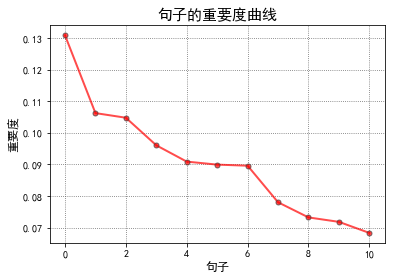

0.13087981109160346 综合美国《星条旗报》和《陆军时报》的消息报道，美国军方称，当地时间7月10日，陆军第25步兵师的一架无人机在怀厄奈山脉进行的一次飞行训练中坠毁，引发灌木丛火灾
0.10625502440658581 根据美国陆军的声明，坠毁的无人机为一架RQ-7“暗影”战术无人机，这架无人机于10日下午3:30左右在瓦胡岛中部的斯科菲尔德兵营附近地区坠毁
0.10478944987284321 檀香山消防局消防队长苏格兰·西格兰特10日表示，檀香山消防局的一架直升机正向瓦胡岛中部发生火灾的地方吊水灭火
0.09606517766502452 截至10日晚上，灭火工作以及对该地区受火灾影响的评估工作仍在进行中
0.09090909090909091 一旦官方调查完成，将会发布更多信息
0.08995824909404901 第25步兵师发言人、高级军士长Andrew Porch说，无人机在檀香山以北约一小时车程的斯科菲尔德军营附近的怀厄奈山区坠毁
0.08961913013573382 美国陆军方面称，第25步兵师也派出了飞机对该地区进行评估并为灭火工作提供帮助
0.07804878094418242 此次坠机事件发生时没有人员受伤，也没有其他飞机在该地区活动
0.07326119907785457 火灾发生后，陆军荒地消防部门与联邦消防局和檀香山消防局一起做出了响应
0.07185551780768326 美军一架无人机在夏威夷坠毁，引发山火目前仍未扑灭


In [3]:
# coding:utf-8

from textrank4zh import TextRank4Keyword, TextRank4Sentence
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

if __name__ == '__main__':
    f = open('./news.txt', mode='r', encoding='utf-8')
    text = f.read()
    f.close()

    tr4w = TextRank4Keyword()
    tr4w.analyze(text=text, lower=True, window=5)
    print('关键词：')
    for item in tr4w.get_keywords(10, word_min_len=1):
        print(item['word'], item['weight'])

    tr4s = TextRank4Sentence()
    tr4s.analyze(text=text, lower=True, source = 'no_stop_words')
    data = pd.DataFrame(data=tr4s.key_sentences)
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w')
    plt.plot(data['weight'], 'ro-', lw=2, ms=5, alpha=0.7, mec='#404040')
    plt.grid(b=True, ls=':', color='#606060')
    plt.xlabel('句子', fontsize=12)
    plt.ylabel('重要度', fontsize=12)
    plt.title('句子的重要度曲线', fontsize=15)
    plt.show()

    key_sentences = tr4s.get_key_sentences(num=10, sentence_min_len=2)
    for sentence in key_sentences:
        print(sentence['weight'], sentence['sentence'])